In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

In [2]:
X_train_res = pd.read_csv('X_train_res.csv')
y_train_res = pd.read_csv('y_train_res.csv')
X_test_res = pd.read_csv('X_test_res.csv')
y_test_res = pd.read_csv('y_test_res.csv')

pca = PCA(n_components=30)
X_train_reduced = pca.fit_transform(X_train_res)
X_test_reduced = pca.transform(X_test_res)

extra_trees = ExtraTreesClassifier(random_state=42)
extra_trees.fit(X_train_reduced, y_train_res)

y_pred = extra_trees.predict(X_test_reduced)

accuracy = accuracy_score(y_test_res, y_pred)
report = classification_report(y_test_res, y_pred, target_names=["Class 0", "Class 1"])

print("Extra Trees Classifier Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

C:\Users\Rohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Extra Trees Classifier Performance:
Accuracy: 0.8356
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.77      0.95      0.85    365842
     Class 1       0.93      0.72      0.81    365842

    accuracy                           0.84    731684
   macro avg       0.85      0.84      0.83    731684
weighted avg       0.85      0.84      0.83    731684



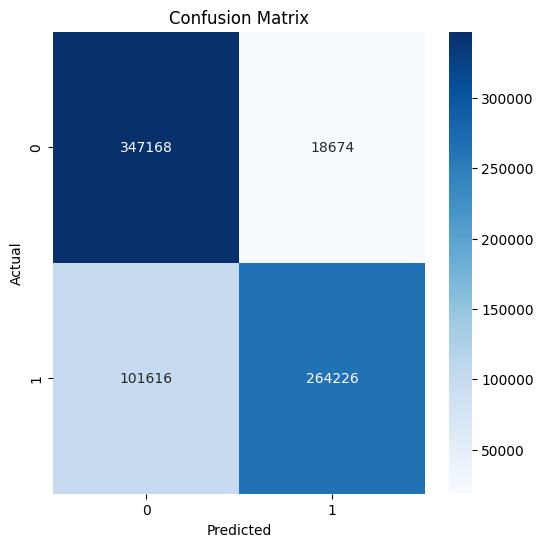

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_res, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()